# Breast cancer prediction

Follows [this](https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction) Kaggle example, but the code was outdated.

So we reworked the example code to work with the latest libraries and also downloaded the data using the UCI ML Repository Python library. Plus we did some extra EDA and data manipulation that was not in their code.

In [44]:
!pip install ucimlrepo
!pip install pandas
!pip install mpld3
!pip install scikit-learn
!pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Mon Jul 17 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb42

First load libraries and clean data.

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [39]:
df = pd.concat([X, y], axis=1) # This is the full dataset
df = df.rename(columns={'Diagnosis':'diagnosis'})
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


Convert malignant and benign to 0s and 1s.

In [40]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Next explore data.

In [41]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


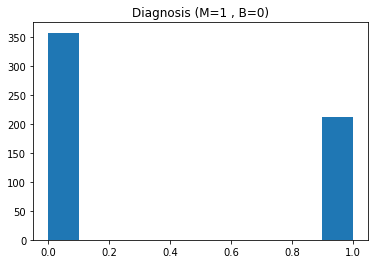

In [42]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [46]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

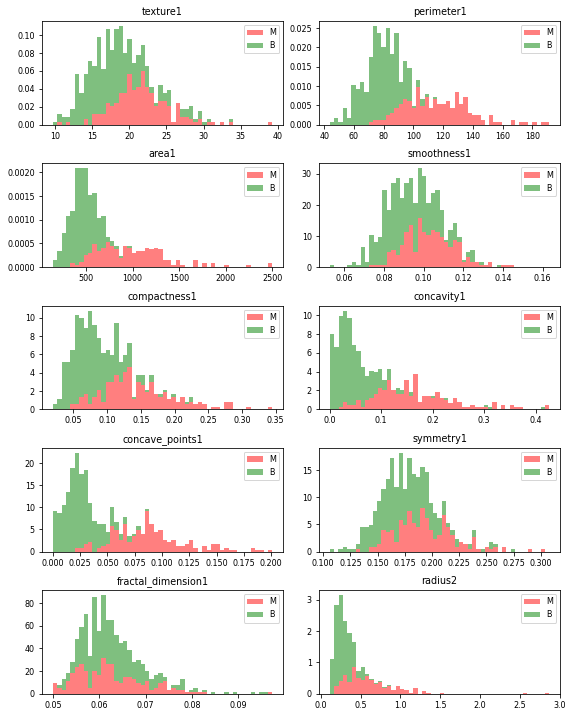

In [47]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

Their observations:

Observations
1. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
1. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

Extra EDA by us:

In [58]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Data contains stats for three different cells. We calculate the mean of all these.

In [69]:
categories=['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

In [70]:
mean_df = df.copy()

for category in categories:
    cols = []
    for col in df.columns:
        if category in col:
            cols.append(col)
    means = df[cols].mean()
    mean_df[f'{category}_mean'] = df[cols].mean(axis=1)
    mean_df = mean_df.drop(cols, axis=1)

In [71]:
mean_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,1,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,1,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,1,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


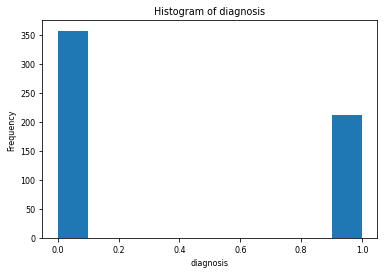

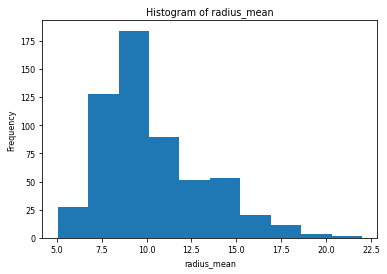

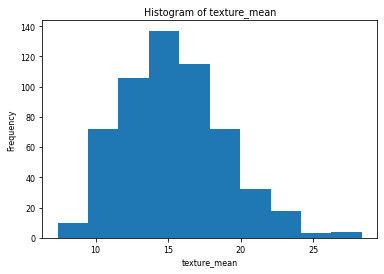

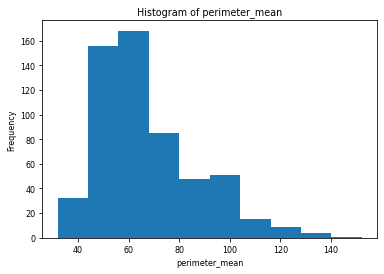

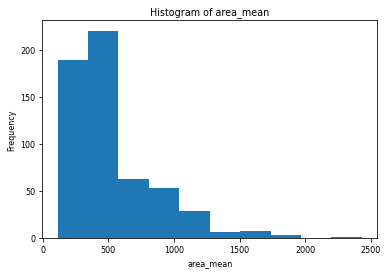

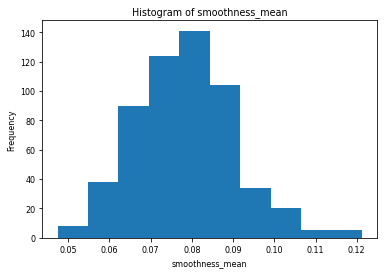

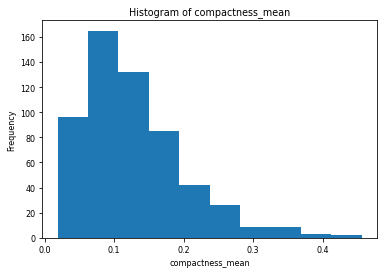

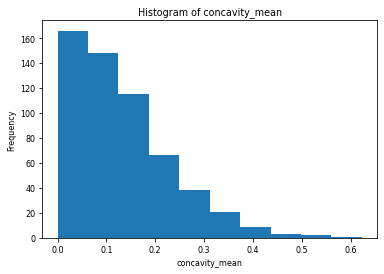

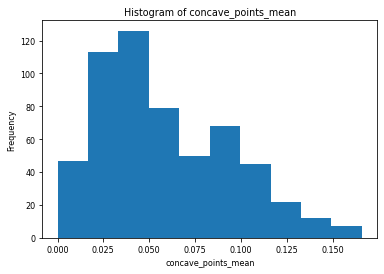

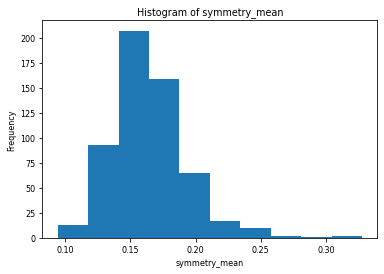

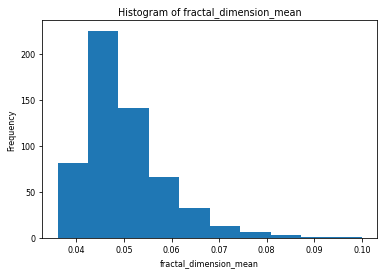

In [74]:
for column in mean_df.columns:
    plt.hist(mean_df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Dataset is massive but even just taking random sample of 10 points shows some structure exists. Even this takes a little while to run.

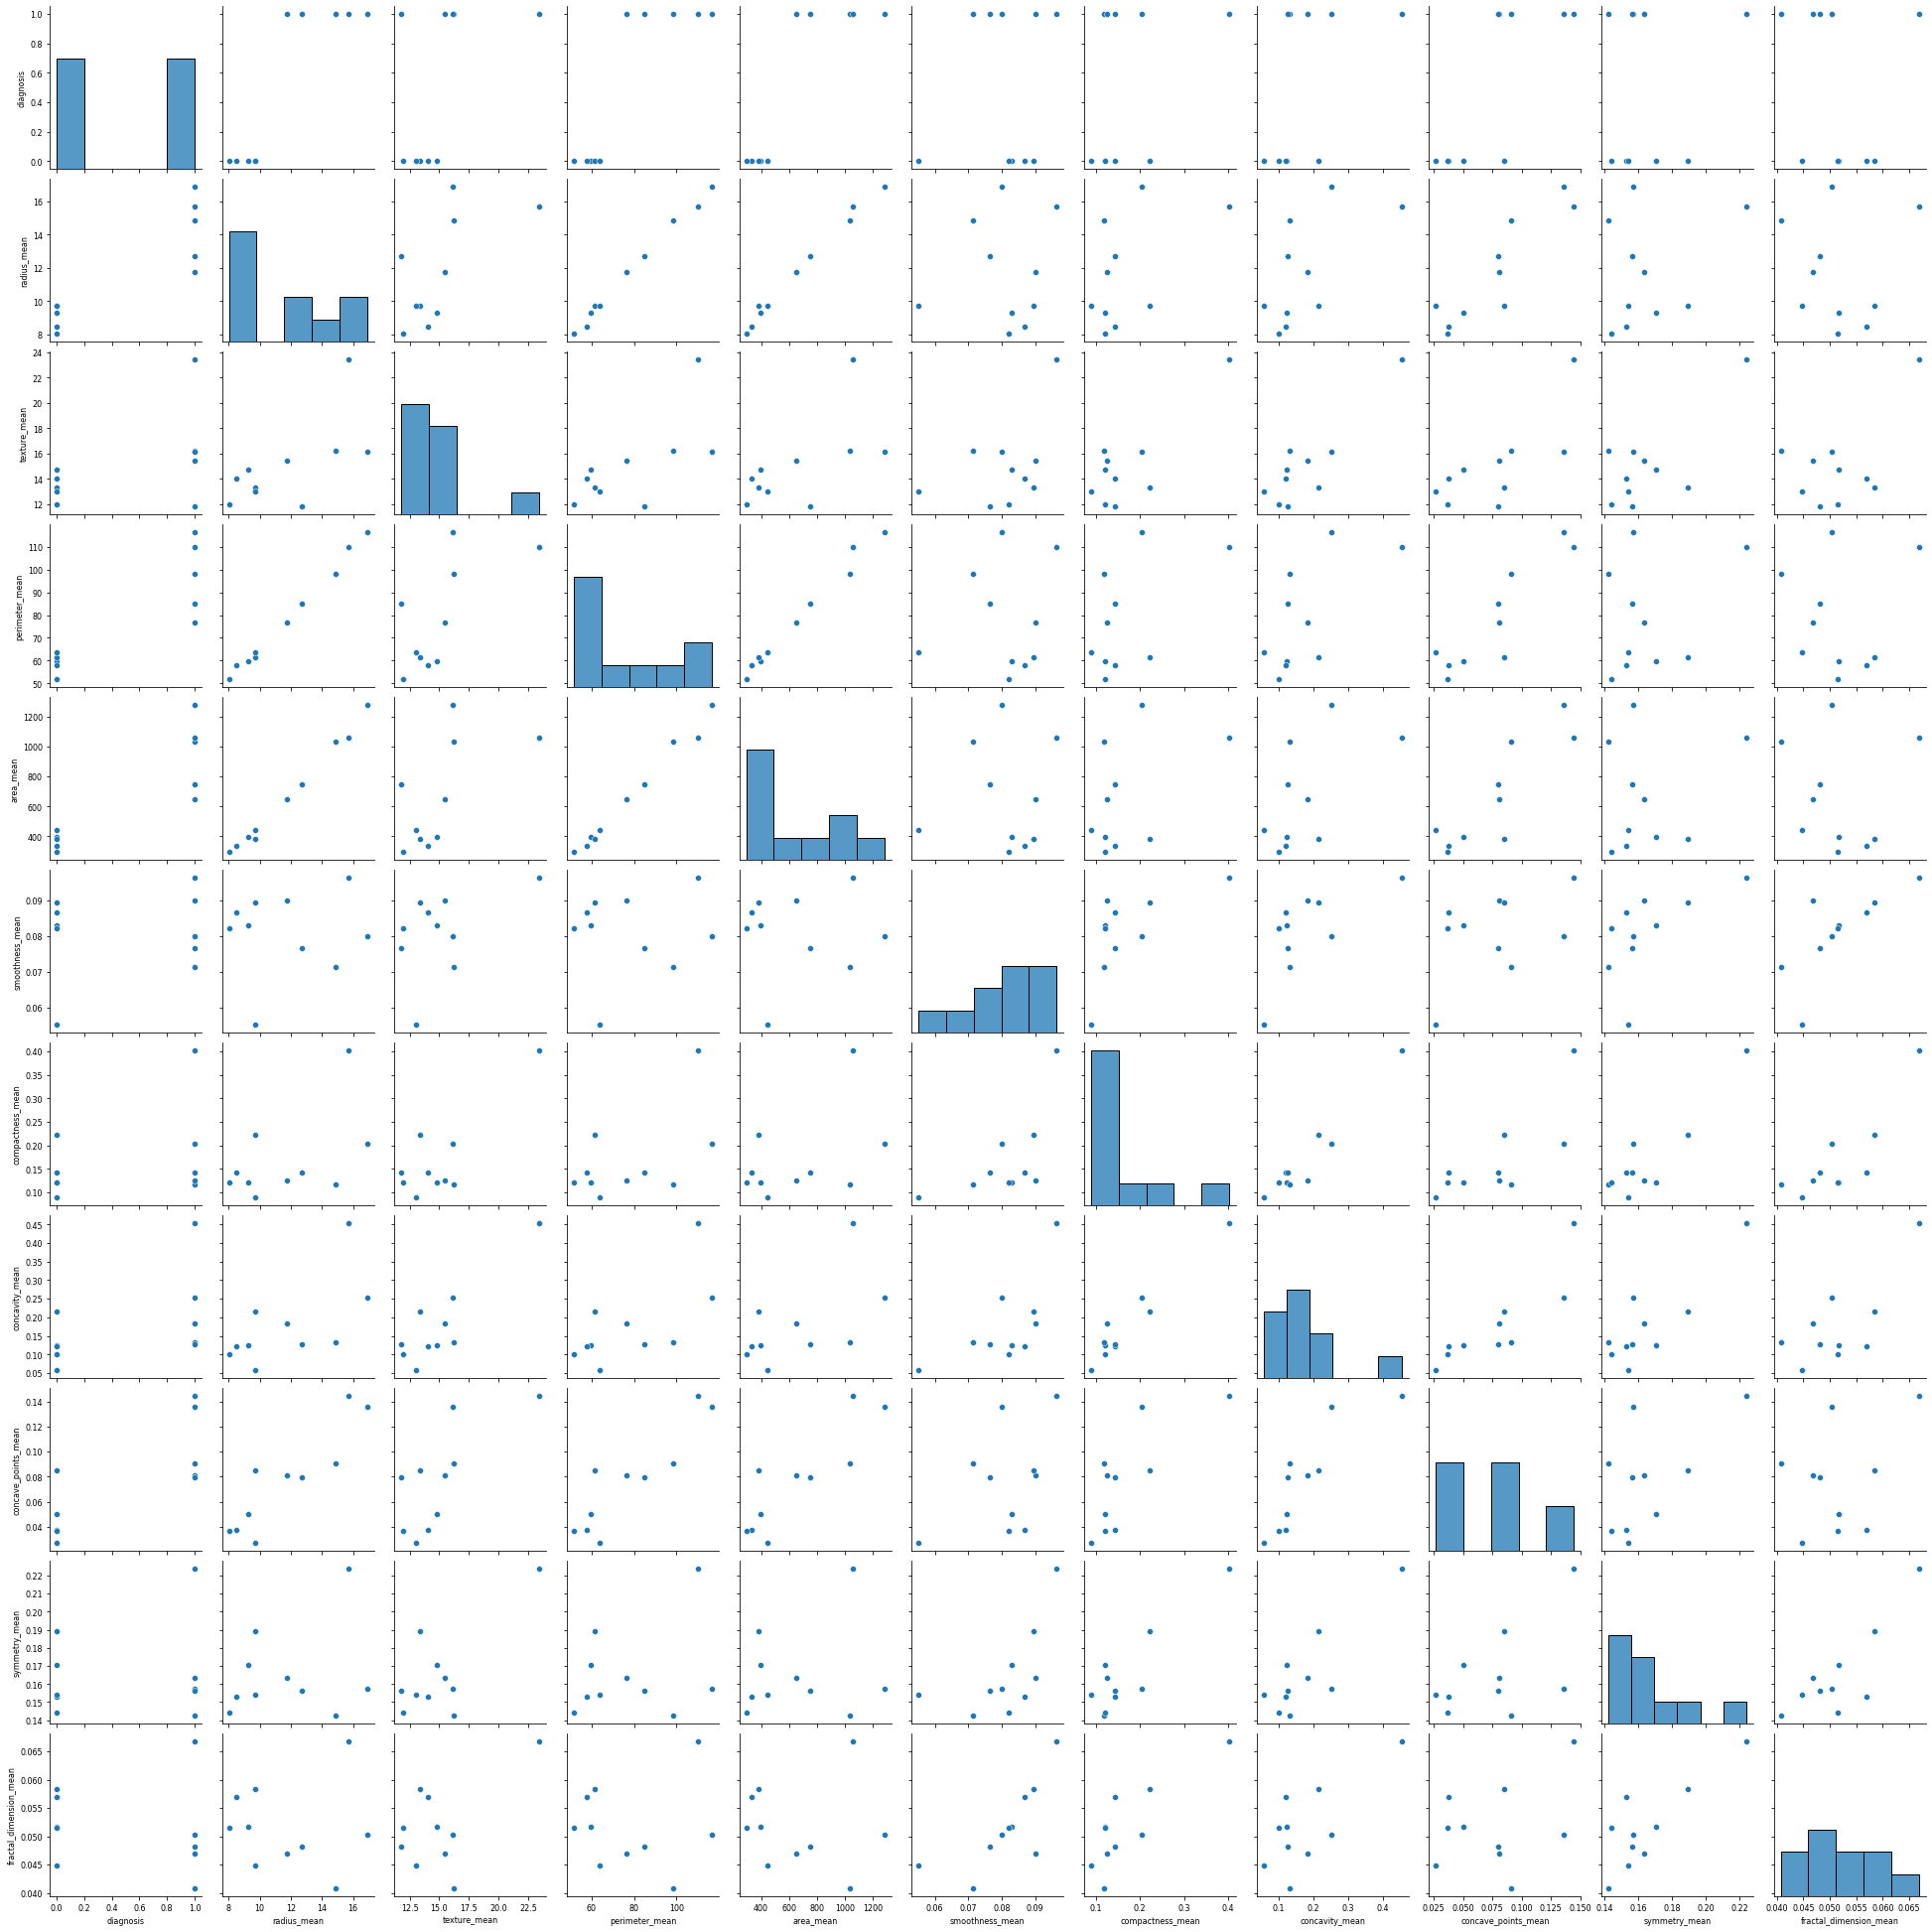

In [118]:
random_sample = mean_df.sample(n=10, random_state=42)
sns.pairplot(random_sample)
plt.show()

In [120]:
corr = mean_df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.763319,0.438766,0.771540,0.728840,0.398652,0.595427,0.662430,0.798201,0.398135,0.232023
radius_mean,0.763319,1.000000,0.332857,0.995827,0.984912,0.171909,0.472424,0.585876,0.806358,0.193887,-0.037835
texture_mean,0.438766,0.332857,1.000000,0.338952,0.325017,0.105176,0.306000,0.324549,0.316863,0.148996,0.112300
perimeter_mean,0.771540,0.995827,0.338952,1.000000,0.981303,0.199899,0.525713,0.628980,0.835453,0.225156,0.011709
area_mean,0.728840,0.984912,0.325017,0.981303,1.000000,0.175652,0.445490,0.569007,0.780372,0.175169,-0.034591
smoothness_mean,0.398652,0.171909,0.105176,0.199899,0.175652,1.000000,0.562209,0.489305,0.529865,0.489112,0.599540
compactness_mean,0.595427,0.472424,0.306000,0.525713,0.445490,0.562209,1.000000,0.885177,0.800559,0.594703,0.751990
concavity_mean,0.662430,0.585876,0.324549,0.628980,0.569007,0.489305,0.885177,1.000000,0.861956,0.505552,0.606356
concave_points_mean,0.798201,0.806358,0.316863,0.835453,0.780372,0.529865,0.800559,0.861956,1.000000,0.470406,0.408368
symmetry_mean,0.398135,0.193887,0.148996,0.225156,0.175169,0.489112,0.594703,0.505552,0.470406,1.000000,0.507403


This tells us for example that radius, perimeter, area and concave points are most highly correlated with the diagnosis (0 or 1).

Now replace X with the mean values for future analysis.

In [91]:
X = mean_df[mean_df.columns[mean_df.columns != 'diagnosis']]
y = mean_df[['diagnosis']]

In [92]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


In [93]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


## Models

Now we'll run a bunch of models (Logistic Regression, Decision Tree, Random Forest) that the original author used, but usually only on a selection of variables (either the most useful five or just the radius).

We write a general function for applying any standard sklearn model.

In [105]:
from sklearn.metrics import accuracy_score

def run_model(model, X, y, selected_features, n_splits=5, random_state=None):
    """
    Run a machine learning model with K-Fold cross-validation.

    Args:
        model: The machine learning model (e.g., LogisticRegression, RandomForestClassifier, etc.).
        X_data: The feature data.
        y_data: The target variable.
        selected_features: A list of selected predictor variables (features).
        n_splits (int): The number of cross-validation splits.
        random_state (int): Random seed for reproducibility.

    Returns:
        mean_accuracy (float): Mean accuracy across all folds.
    """
    # Initialize the model
    ml_model = model

    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Lists to store cross-validation results
    accuracies = []
    
    X_data = X[selected_features]
    y_data = y['diagnosis']

    # Perform K-Fold cross-validation
    for train_idx, test_idx in kf.split(X_data):
        X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
        y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

        # If X_data has only one feature, reshape it to a 2D array
        if len(selected_features) == 1:
            X_train = X_train.values.reshape(-1, 1)
            X_test = X_test.values.reshape(-1, 1)

        # Fit the model on the training data
        ml_model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = ml_model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Calculate the mean accuracy across all folds
    mean_accuracy = sum(accuracies) / n_splits
    
    print(f"Accuracies: {accuracies}")
    print(f"Mean Accuracy: {mean_accuracy}")

    return mean_accuracy

### Logistic Regression

In [106]:
pred_vars = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave_points_mean']

In [107]:
run_model(LogisticRegression(), X, y, pred_vars, n_splits=5, random_state=42)

Accuracies: [0.9473684210526315, 0.9210526315789473, 0.8771929824561403, 0.8859649122807017, 0.8584070796460177]
Mean Accuracy: 0.8979972054028877


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8979972054028877

Now just one predictor

In [108]:
run_model(LogisticRegression(), X, y, ['radius_mean'], n_splits=5, random_state=42)

Accuracies: [0.9385964912280702, 0.9385964912280702, 0.868421052631579, 0.9122807017543859, 0.8495575221238938]
Mean Accuracy: 0.9014904517931999


0.9014904517931999

### Decision Tree

In [109]:
run_model(DecisionTreeClassifier(), X, y, pred_vars, n_splits=5, random_state=42)

Accuracies: [0.9385964912280702, 0.9122807017543859, 0.8771929824561403, 0.956140350877193, 0.9469026548672567]
Mean Accuracy: 0.9262226362366093


0.9262226362366093

In [110]:
run_model(DecisionTreeClassifier(), X, y, ['radius_mean'], n_splits=5, random_state=42)

Accuracies: [0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8157894736842105, 0.8761061946902655]
Mean Accuracy: 0.8646949231485793


0.8646949231485793

### Random Forest

In [111]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
run_model(rf_model, X, y, pred_vars, n_splits=5, random_state=42)

Accuracies: [0.956140350877193, 0.9736842105263158, 0.9122807017543859, 0.9385964912280702, 0.9380530973451328]
Mean Accuracy: 0.9437509703462196


0.9437509703462196

In [112]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
run_model(rf_model, X, y, X.columns, n_splits=5, random_state=42)

Accuracies: [0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9469026548672567]
Mean Accuracy: 0.9507840397453812


0.9507840397453812

In [113]:
#Create a series with feature importances:
featimp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(featimp)

concave_points_mean       0.222535
area_mean                 0.216495
perimeter_mean            0.168991
radius_mean               0.158112
concavity_mean            0.102959
compactness_mean          0.059896
texture_mean              0.024571
smoothness_mean           0.021105
symmetry_mean             0.013040
fractal_dimension_mean    0.012297
dtype: float64


In [114]:
top5_features = ['concave_points_mean', 'area_mean', 'perimeter_mean', 'concavity_mean', 'compactness_mean']

In [115]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
run_model(rf_model, X, y, top5_features, n_splits=5, random_state=42)

Accuracies: [0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9380530973451328]
Mean Accuracy: 0.9437509703462196


0.9437509703462196

In [121]:
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
run_model(rf_model, X, y, ['radius_mean'], n_splits=5, random_state=42)

Accuracies: [0.956140350877193, 0.9122807017543859, 0.8859649122807017, 0.8859649122807017, 0.8407079646017699]
Mean Accuracy: 0.8962117683589504


0.8962117683589504

Overall, we get pretty high mean accuracies and good cross-validation. It is even better the more features that we use, which makes sense.